## Exploring IMBD's Top 250 Movies (August 2024)

- IMDB Top 250: [https://www.imdb.com/chart/top/](https://www.imdb.com/chart/top/)
- Dataset: [https://www.kaggle.com/datasets/dimitarmitkov/imdb-top-250/data?select=IMDB_Top250.csv](https://www.kaggle.com/datasets/dimitarmitkov/imdb-top-250/data?select=IMDB_Top250.csv)

In [1]:
import pandas as pd
import json
from ast import literal_eval

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("IMDB_Top250.csv")

In [4]:
data.head()

,Unnamed: 0,type,url,name,image,description,rating,rating_count,content_rating,genre,...,creator,duration,popularity,metascore,plot,interests,budget_amount,budget_currency,gross_amount,gross_currency
0,1,Movie,https://www.imdb.com/title/tt0111161/,The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BNDE3OD...,A Maine banker convicted of the murder of his ...,9.3,2933446,R,['Drama'],...,"[{'@type': 'Organization', 'url': 'https://www...",142,63.0,82.0,A Maine banker convicted of the murder of his ...,"['Epic', 'Period Drama', 'Prison Drama', 'Trag...",25000000.0,USD,28767189.0,USD
1,2,Movie,https://www.imdb.com/title/tt0068646/,The Godfather,https://m.media-amazon.com/images/M/MV5BNTc0ZD...,"Don Vito Corleone, head of a mafia family, dec...",9.2,2044558,R,"['Crime', 'Drama']",...,"[{'@type': 'Organization', 'url': 'https://www...",175,73.0,100.0,"Don Vito Corleone, head of a mafia family, dec...","['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']",6000000.0,USD,136381073.0,USD
2,3,Movie,https://www.imdb.com/title/tt0468569/,The Dark Knight,https://m.media-amazon.com/images/M/MV5BMTMxNT...,When the menace known as the Joker wreaks havo...,9.0,2913889,PG-13,"['Action', 'Crime', 'Drama']",...,"[{'@type': 'Organization', 'url': 'https://www...",152,90.0,84.0,When the menace known as the Joker wreaks havo...,"['Action Epic', 'Epic', 'Superhero', 'Action',...",185000000.0,USD,534987076.0,USD
3,4,Movie,https://www.imdb.com/title/tt0071562/,The Godfather Part II,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The early life and career of Vito Corleone in ...,9.0,1382521,R,"['Crime', 'Drama']",...,"[{'@type': 'Organization', 'url': 'https://www...",202,239.0,90.0,The early life and career of Vito Corleone in ...,"['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']",13000000.0,USD,47834595.0,USD
4,5,Movie,https://www.imdb.com/title/tt0050083/,12 Angry Men,https://m.media-amazon.com/images/M/MV5BMWU4N2...,The jury in a New York City murder trial is fr...,9.0,880835,B,"['Crime', 'Drama']",...,"[{'@type': 'Organization', 'url': 'https://www...",96,329.0,97.0,The jury in a New York City murder trial is fr...,"['Legal Drama', 'Psychological Drama', 'Crime'...",350000.0,USD,NaN,NaN


## Preprocessing

Let's give the rank column a more appropriate name

In [5]:
data = data.rename(columns={"Unnamed: 0": "rank"})

Explode columns with non-scalar values should make analysis easier

In [6]:
data["genre"] = data["genre"].apply(literal_eval)

In [7]:
data["director"] = data["director"].apply(lambda x: [item.get("name") for item in literal_eval(x)])

In [8]:
data["creator"] = data["creator"].apply(lambda x: [item.get("name") for item in literal_eval(x)])

In [9]:
data = data.explode("genre")

In [10]:
data = data.explode("director")

In [11]:
data = data.explode("creator")

## Directors

In [12]:
directors_with_highest_avg_rating = data[["director", "rating"]].groupby("director").mean().sort_values(by="rating", ascending=False).head(10)

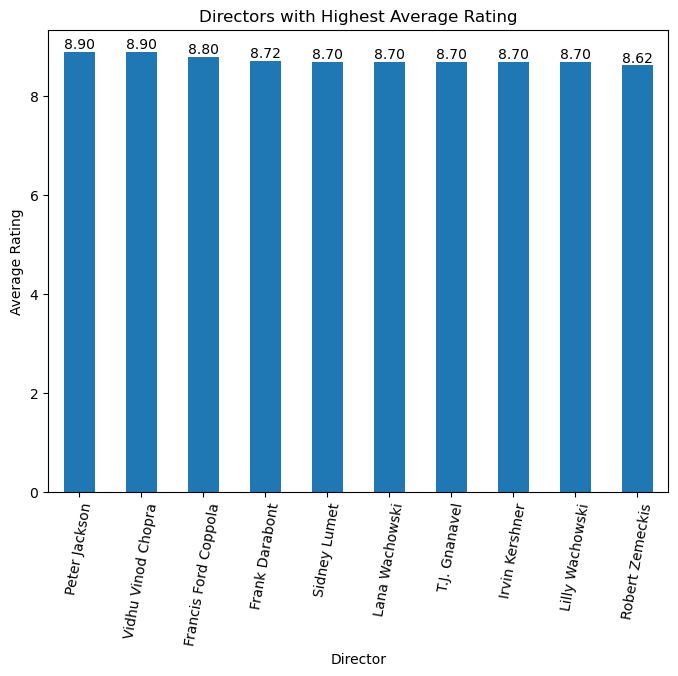

In [13]:
plt = directors_with_highest_avg_rating.plot(kind="bar",
                                             rot=80,
                                             legend=False,
                                             title="Directors with Highest Average Rating",
                                             xlabel="Director",
                                             ylabel="Average Rating",
                                             figsize=(8,6)
                                            )

for i, v in enumerate(directors_with_highest_avg_rating['rating']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

In [14]:
directors_with_most_top250_films = data[["director", "rank"]].groupby("director")["rank"].nunique().sort_values(ascending=False).head(10)

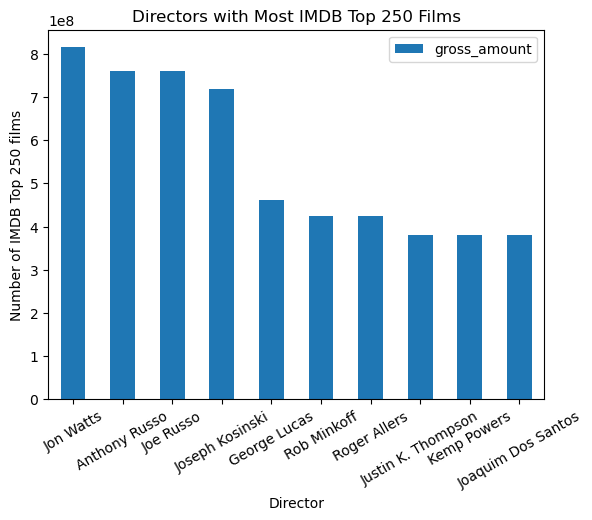

In [81]:
plot = directors_with_most_top250_films.plot(kind="bar", 
                                             rot=30, 
                                             xlabel="Director",
                                             ylabel="Number of IMDB Top 250 films",
                                             title="Directors with Most IMDB Top 250 Films")

In [16]:
directors_with_longest_films = directors_with_most_top250_films = data[["director", "duration"]].groupby("director").mean().sort_values(by="duration", ascending=False).head(10)

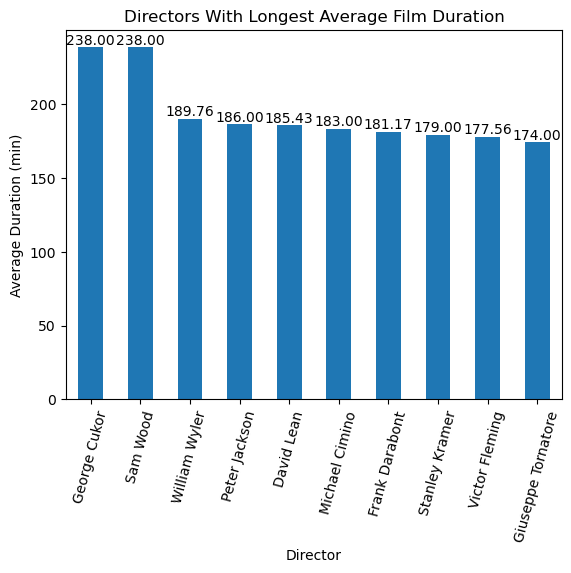

In [17]:
plt = directors_with_longest_films.plot(kind="bar",
                                        rot=75,
                                        xlabel="Director",
                                        ylabel="Average Duration (min)",
                                        legend=False,
                                        title="Directors With Longest Average Film Duration"
                                       )

for i, v in enumerate(directors_with_longest_films['duration']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

In [35]:
directors_with_highest_average_gross_usd = data[data["gross_currency"] == "USD"][["director", "gross_amount"]].groupby("director").mean().sort_values(by="gross_amount", ascending=False).head(10)

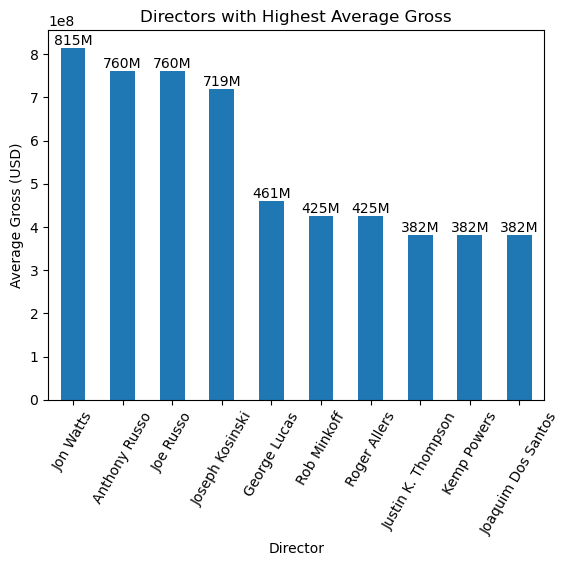

In [36]:
plt = directors_with_highest_average_gross_usd.plot(kind="bar",
                                                    title="Directors with Highest Average Gross",
                                                    xlabel="Director",
                                                    ylabel="Average Gross (USD)",
                                                    legend=False,
                                                    rot=60
                                                   )

for i, v in enumerate(directors_with_highest_average_gross_usd['gross_amount']):
    plt.text(i, v, f'{round(v / 1_000_000)}M', ha='center', va='bottom')

In [39]:
directors_with_highest_average_budget_usd = data[data["budget_currency"] == "USD"][["director", "budget_amount"]].groupby("director").mean().sort_values(by="budget_amount", ascending=False).head(10)

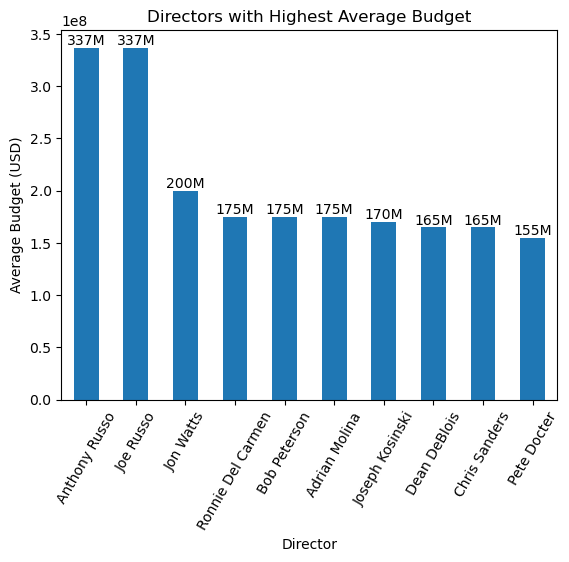

In [76]:
plt = directors_with_highest_average_budget_usd.plot(kind="bar",
                                                     rot=60,
                                                     legend=False,
                                                     title="Directors with Highest Average Budget",
                                                     xlabel="Director",
                                                     ylabel="Average Budget (USD)"
                                                    )

for i, v in enumerate(directors_with_highest_average_budget_usd['budget_amount']):
    plt.text(i, v, f'{round(v / 1_000_000)}M', ha='center', va='bottom')

In [85]:
top_comedic_directors = data[data["genre"] == "Comedy"][["rank", "director"]].groupby("director")["rank"].nunique().sort_values(ascending=False).head(10)

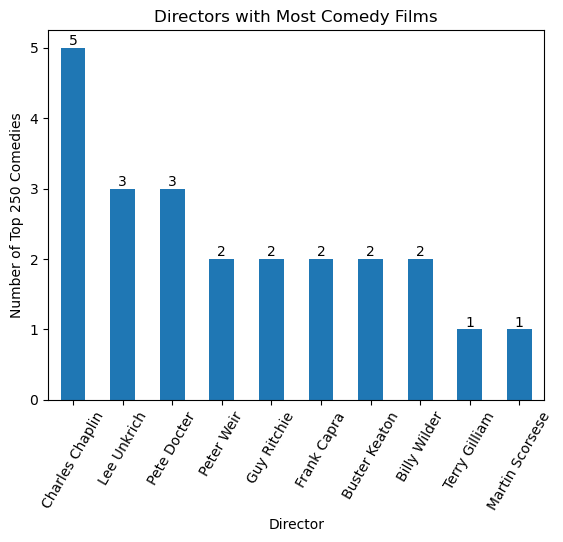

In [86]:
plt = top_comedic_directors.plot(kind="bar",
                                 rot=60,
                                 title="Directors with Most Comedy Films",
                                 xlabel="Director",
                                 ylabel="Number of Top 250 Comedies")

for i, v in enumerate(top_comedic_directors):
    plt.text(i, v, v, ha='center', va='bottom')

In [87]:
top_drama_directors = data[data["genre"] == "Drama"][["rank", "director"]].groupby("director")["rank"].nunique().sort_values(ascending=False).head(10)

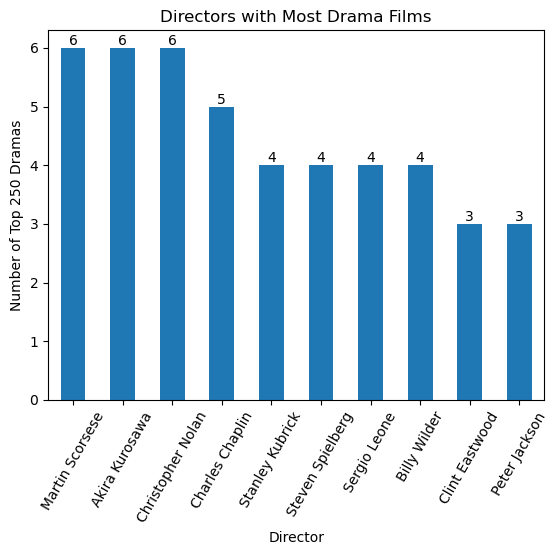

In [88]:
plt = top_drama_directors.plot(kind="bar",
                                 rot=60,
                                 title="Directors with Most Drama Films",
                                 xlabel="Director",
                                 ylabel="Number of Top 250 Dramas")

for i, v in enumerate(top_drama_directors):
    plt.text(i, v, v, ha='center', va='bottom')